# Time series querying

Veronica Andreo  
2024-08-14

In this sixth time series tutorial, we will go through time series
querying and compare and contrast the different tools available
according to their inputs, outputs and other options. We will split
tools into two groups according to their name to facilitate comparisons:

-   temporal tools:
    [t.rast.what](https://grass.osgeo.org/grass-stable/manuals/t.rast.what.html),
    [t.rast.what.aggr](https://grass.osgeo.org/grass-stable/manuals/addons/t.rast.what.aggr.html),[t.vect.observe.strds](https://grass.osgeo.org/grass-stable/manuals/t.vect.observe.strds.html),
    [t.vect.what.strds](https://grass.osgeo.org/grass-stable/manuals/t.vect.what.strds.html)
    and,
-   vector tools:
    [v.what.strds](https://grass.osgeo.org/grass-stable/manuals/v.what.strds.html),
    [v.what.strds.timestamp](https://grass.osgeo.org/grass-stable/manuals/addons/v.what.strds.timestamp.html),
    [v.strds.stats](https://grass.osgeo.org/grass-stable/manuals/addons/v.strds.stats.html).

> **Setup**
>
> This tutorial can be run locally or in Google Colab. However, make
> sure you install GRASS 8.4+, download the [LST sample
> project](https://zenodo.org/doi/10.5281/zenodo.3564514) and set up
> your project as explained in the
> [first](time_series_management_and_visualization.qmd) time series
> tutorial.

## Temporal tools

All the temporal tools that allow to query raster time series take
either coordinates or a point vector map as inputs to sample one or
various STRDS. Regarding outputs, the *t.rast.\** tools retrieve values
to stdout, write them in plain text files or update the vector attribute
table. In contrast, the *t.vect.\** tools output vector time series.
Only two of these tools allow to do queries with temporal aggregation of
the raster data either according to a fixed date or a date column in the
case of *t.rast.what.aggr* or with temporal topology relations in the
case of *t.vect.what.strds*.

| Tools/<br>options | [t.rast.what](https://grass.osgeo.org/grass-stable/manuals/t.rast.what.html) | [t.rast.what.aggr](https://grass.osgeo.org/grass-stable/manuals/addons/t.rast.what.aggr.html) | [t.vect.observe.strds](https://grass.osgeo.org/grass-stable/manuals/t.vect.observe.strds.html) | [t.vect.what.strds](https://grass.osgeo.org/grass-stable/manuals/t.vect.what.strds.html) |
|---------------|---------------|---------------|---------------|---------------|
| Purpose | Samples a STRDS at vector points and writes the output to stdout or text file with different layouts | Samples a STRDS at vector points and returns aggregated values to stdout or in the attribute table | Samples STRDSs at points from a vector map and outputs a STVDS | Samples a STRDS at the spatio-temporal locations of a STVDS |
| input | vector (points) or coordinates and strds | vector (points) and strds | vector (points) and STRDS(s) | STVDS (points) and strds |
| output | stdout or plain text file | vector, plain text or stdout | STVDS | STVDS |
| where | yes |  | yes | yes |
| t_where |  |  |  | yes |
| spatial aggr |  |  |  |  |
| temporal aggr |  | yes |  | yes |
| example | t.rast.what -n strds=A points=points output=result.txt layout=row | t.rast.what.aggr input=points strds=A date=“2015-05-01” granularity=“2 months” | t.vect.observe.strds input=points strds=A output=points_stvds vector_output=points_vector columns=A_values | t.vect.what.strds input=points strds=A column=A_values method=average |

Comparison of temporal tools that allow to query space time raster
datasets.

Let’s see some examples. We will first randomly extract the centroids of
15 Italian regions in our study area and save them as a point vector map
to query the raster time series afterwards.

In [2]:
# Create 15 random points and add attr table
gs.run_command("v.random",
               output="sampling_points",
               npoints=15,
               restrict="italy_borders_2_clip",
               seed=47)
gs.run_command("v.db.addtable",
               map="sampling_points",
               columns="cat integer")

In [3]:
# Display polygons and points
points = gj.Map()
points.d_vect(map="italy_borders_2_clip", type="boundary")
points.d_vect(map="sampling_points", icon="basic/circle", size=8)
points.d_barscale()
points.show()

In [4]:
# Save map
points.save("points.png")

<figure>
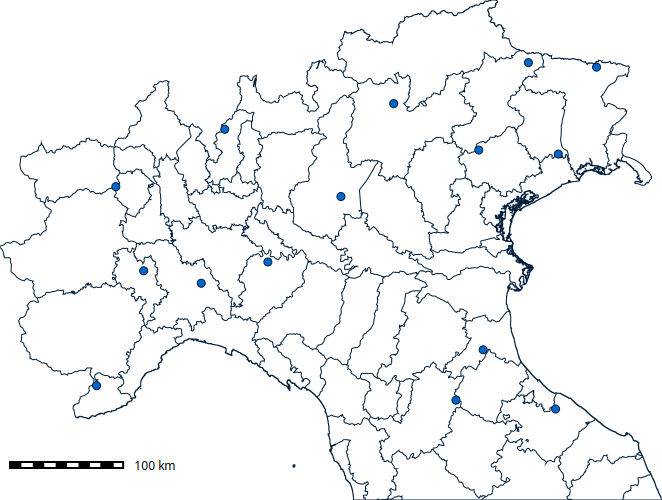
<figcaption aria-hidden="true">Sample points</figcaption>
</figure>

In [5]:
# Calculate monthly LST time series
gs.run_command("t.rast.aggregate",
               input="lst_daily",
               output="lst_monthly",
               basename="lst_monthly",
               granularity="1 month",
               suffix="gran",
               method="average")

Let’s start by using *t.rast.what* that will output the result in the
standard output, i.e., the terminal, the GUI console or the Jupyter
cell.

In [6]:
# Get LST monthly values for the points
gs.run_command("t.rast.what",
               points="sampling_points",
               strds="lst_monthly",
               layout="row",
               flags="n")

    x|y|start|end|value
    4577892.8167900704|2607156.3643725100|2014-01-01 00:00:00|2014-02-01 00:00:00|-3.3495627520159
    4577892.8167900704|2607156.3643725100|2014-02-01 00:00:00|2014-03-01 00:00:00|-4.49710379464276
    4577892.8167900704|2607156.3643725100|2014-03-01 00:00:00|2014-04-01 00:00:00|2.75497920866939
    4577892.8167900704|2607156.3643725100|2014-04-01 00:00:00|2014-05-01 00:00:00|5.8034850260417
    4577892.8167900704|2607156.3643725100|2014-05-01 00:00:00|2014-06-01 00:00:00|9.28137663810487
    4577892.8167900704|2607156.3643725100|2014-06-01 00:00:00|2014-07-01 00:00:00|13.8477356770834
    4577892.8167900704|2607156.3643725100|2014-07-01 00:00:00|2014-08-01 00:00:00|15.1575793850807
    4577892.8167900704|2607156.3643725100|2014-08-01 00:00:00|2014-09-01 00:00:00|13.6287058971774
    4577892.8167900704|2607156.3643725100|2014-09-01 00:00:00|2014-10-01 00:00:00|11.6199055989584
    4577892.8167900704|2607156.3643725100|2014-10-01 00:00:00|2014-11-01 00:00:00|8.36024697580648
    4577892.8167900704|2607156.3643725100|2014-11-01 00:00:00|2014-12-01 00:00:00|2.6866315104167
    4577892.8167900704|2607156.3643725100|2014-12-01 00:00:00|2015-01-01 00:00:00|-1.45273122479836
    4577892.8167900704|2607156.3643725100|2015-01-01 00:00:00|2015-02-01 00:00:00|-3.12071761592739

> **Layouts**
>
> Users can then play around with the different output layouts, i.e.,
> *row, column, timerow*, to find the one that better suits their data
> pipelines.

Now, to exemplify the use of *t.rast.what.aggr* imagine we did some
mosquito trappings at the 15 sites at two different dates and we need to
know which was the average LST the two months before the trappings.
Since the dates are different, we actually need to aggregate different
days. This is done on the fly (i.e., without the need to aggregate the
whole raster time series) with the extension *t.rast.what.aggr*. Let’s
install it and add dates to our point vector map.

In [7]:
# Install t.rast.what.aggr extension
gs.run_command("g.extension", extension="t.rast.what.aggr")

In [8]:
# Add a new date type column
gs.run_command("v.db.addcolumn",
               map="sampling_points",
               column="sampling_date date")

# Add values to the date column
gs.run_command("v.db.update",
               map="sampling_points",
               column="sampling_date",
               value="2018-07-01")
gs.run_command("v.db.update",
               map="sampling_points",
               column="sampling_date",
               value="2018-08-10",
               where="cat >= '9'")

In [9]:
# Inspect dates
gs.vector_db_select("sampling_points")

We will use the daily time series in this case to get the aggregation
period right.

In [10]:
# Get aggregated LST values
gs.run_command("t.rast.what.aggr",
               input="sampling_points",
               strds="lst_daily",
               date_column="sampling_date",
               granularity="2 months",
               method="average",
               flags="c")

Let’s display the result by converting the attribute table into a Pandas
DataFrame.

In [11]:
import pandas as pd

data = gs.parse_command("v.db.select",
                        map="sampling_points",
                        format="json")

pd.DataFrame(data['records'])

> **Question**
>
> What would be the result if we use the monthly time series?

Let’s demonstrate now the use of *t.vect.observe.strds* and
*t.vect.what.strds*. These tools, as mentioned above, output a vector
time series or STVDS. Vector time series in GRASS can be created either
from a series of vector maps (especially if features/geometries vary in
time) or from layers added to a single vector map (i.e., features are
always the same, as in the case of meteorological stations).

We start with *t.vect.observe.strds*. It will create a new vector map
with as many layers as raster maps there are in the STRDS we are
querying and it will register these in a STVDS.

In [12]:
gs.run_command("t.vect.observe.strds",
               input="sampling_points",
               strds="lst_monthly",
               output="sp_lst_monthly",
               vector_output="sp_lst_monthly",
               columns="lst")

In [13]:
# Check the STVDS is created
gs.run_command("t.info",
               input="sp_lst_monthly",
               type="stvds")

In [14]:
# Check number of layers in the vector map
gs.vector_info("sp_lst_monthly")["num_dblinks"]

In [15]:
# Check one layer
gs.vector_db_select("sp_lst_monthly", layer=7)["values"]

In [16]:
# Check all layers
gs.run_command("t.vect.db.select",
               input="sp_lst_monthly")

Let’s now compare the values obtained by querying the monthly LST time
series with those resulting from aggregating the daily LST time series.
They should be the same. For that we need to specify the sampling
relation. The temporal tool that allows to specify sampling relations
and do temporal aggregation is *t.vect.what.strds*. It requires a STVDS
as input, so we’ll use the one we just obtained above. We also specify
the *start* relation, so all maps in the STRDS which start time matches
the STVDS will be aggregated. Let’s see this graphically before running
the tool.

<figure>
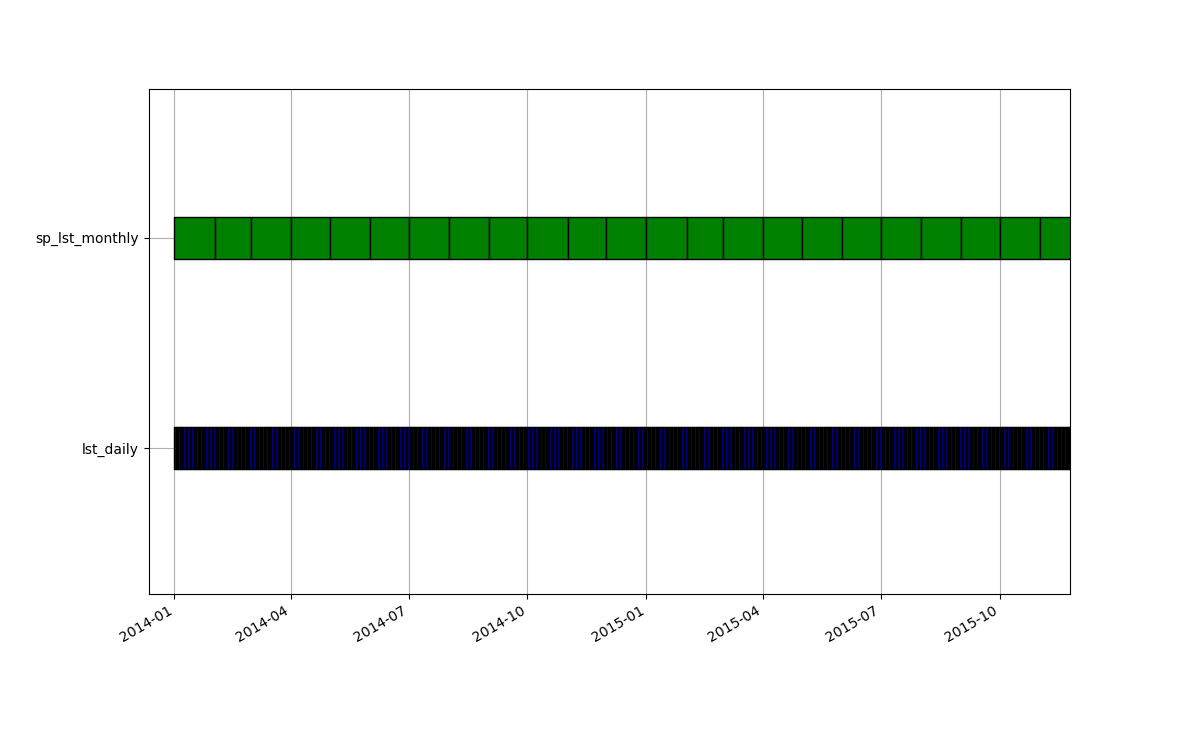
<figcaption aria-hidden="true">Comparisaon of granularities</figcaption>
</figure>

In [17]:
gs.run_command("t.vect.what.strds",
               input="sp_lst_monthly",
               strds="lst_daily",
               column="lst_new",
               method="average",
               sampling="start")

In [18]:
gs.run_command("t.vect.db.select",
               input="sp_lst_monthly")

As expected, results are exactly the same! So, if you are constrained by
disk space for example, you don’t need to aggregate your entire STRDS if
you only need aggregated values for a set of points.

> **Note**
>
> We could have also used
> [t.sample](https://grass.osgeo.org/grass84/manuals/t.sample.html) to
> check which maps from `lst_daily` would be aggregated in the new
> column `lst_new` above.
>
> See for yourself and try with different sampling methods:
>
> ``` python
> gs.run_command("t.sample",
>               input="lst_daily",
>               sample="sp_lst_monthly",
>               intype="strds",
>               samtype="stvds",
>               method="start")
> ```

## Vector tools

The main difference between temporal and vector tools to query raster
time series is that vector tools can update the attribute table of the
input vector without creating more layers. Regarding inputs, both
*v.what.strds* and *v.what.strds.timestamp* take a point vector map as
input, while *v.strds.stats* takes a line or polygon vector map and
performs spatial aggregation, i.e. zonal statistics over the full or a
part of the STRDS. The extension *v.what.strds.timestamp*, somehow
similar to *t.rast.what.aggr*, offers the possibility of reading input
points’ date information from a column in the attribute table and only
performs the query for the dates that match. It also offers spatial
interpolation of the four nearest pixels.

| Tools/<br>options | [v.what.strds](https://grass.osgeo.org/grass-stable/manuals/v.what.strds.html) | [v.what.strds.timestamp](https://grass.osgeo.org/grass-stable/manuals/addons/v.what.strds.timestamp.html) | [v.strds.stats](https://grass.osgeo.org/grass-stable/manuals/addons/v.strds.stats.html) |
|------------------|------------------|------------------|------------------|
| Purpose | Retrieves raster values from STRDSs using a point vector map | Matches points with timestamp in the attribute table with STRDSs based on point locations in space and time, and updates the input vector’s attribute table | Calculates zonal statistics from STRDSs and uploads values to attribute columns of a new vector map |
| input | vector (points) and STRDS(s) | vector (points) and STRDS(s) | vector (lines or polygons) and STRDS(s) |
| output | vector | vector | vector |
| where | yes | yes | yes |
| t_where | yes | yes | yes |
| spatial aggr |  |  | yes |
| temporal aggr |  |  |  |
| spatial interp |  | yes |  |
| example | v.what.strds -u input=points strds=A | v.what.strds.timestamp input=points timestamp_column=sampling_time column=A_at_sampling_time strds=A | v.strds.stats input=areas strds=A output=areas_new method=average |

Comparison of vector tools that allow to query space time raster
datasets.

Let’s go through the usage of the vector tools to query raster time
series now. When we run *v.what.strds* to query STRDS we can either save
the results in a new vector map or update the input vector attribute
table by setting the `u` flag. In this case, we’ll create a new vector
map and do a temporal selection.

In [20]:
# Run v.what.strds with temporal selection
gs.run_command("v.what.strds",
               input="sampling_points",
               strds="lst_monthly",
               output="sp_lst_monthly_2014",
               t_where="start_time <= '2015-01-01'")

Let’s check the new vector created. It contains a new column per map in
the queried STRDS.

In [21]:
data = gs.parse_command("v.db.select",
                        map="sp_lst_monthly_2014",
                        format="json")

pd.DataFrame(data['records'])

The tool *v.what.strds.timestamp* is an extension so we need to install
it first. It will by default update the input vector attribute table
with a column that needs to be specified by the user. Furthermore, it
offers spatial interpolation of the four nearest cells via the `i` flag.
Let’s compare the results with and without it.

In [22]:
gs.run_command("g.extension", extension="v.what.strds.timestamp")

In [23]:
# with spatial interp of neighbor cells
gs.run_command("v.what.strds.timestamp",
               input="sampling_points",
               timestamp_column="sampling_date",
               column="lst_sampling_date_i",
               strds="lst_daily",
               flags="i")

# without spatial interp of neighbor cells
gs.run_command("v.what.strds.timestamp",
               input="sampling_points",
               timestamp_column="sampling_date",
               column="lst_sampling_date_no_i",
               strds="lst_daily")

Let’s check the results.

In [24]:
data = gs.parse_command("v.db.select",
                        map="sampling_points",
                        format="json")

pd.DataFrame(data['records'])

Finally, we’ll extract zonal statistics of a raster time series. For
this, we need either a line or polygon vector map as input. We’ll use
the map of italian municipalities and demonstrate the use of spatial
(`where`) and temporal (`t_where`) selection.

In [25]:
# Install v.strds.stats extension
gs.run_command("g.extension", extension="v.strds.stats")

In [26]:
# Extract August average LST for Milano municipality
gs.run_command("v.strds.stats",
               input="italy_borders_3",
               strds="lst_monthly",
               where="NAME_3 == 'Milano'",
               t_where="strftime('%m', start_time)='08'",
               output="milano_lst_august",
               method="average")

In [27]:
gs.vector_db_select("milano_lst_august")["values"]

Let’s now try to find out which municipality in northern Italy had the
highest August average temperature each year?

In [28]:
# Clip municipalities to computational region
gs.run_command("v.clip",
               input="italy_borders_3",
               output="italy_borders_3_clip",
               flags="r")

In [29]:
# Extract summer average LST municipalities
gs.run_command("v.strds.stats",
               input="italy_borders_3_clip",
               strds="lst_monthly",
               t_where="strftime('%m', start_time)='08'",
               output="municip_lst_august",
               method="average")

In [30]:
# Check the output table
data = gs.parse_command("v.db.select",
                        map="municip_lst_august",
                        format="json")

table = pd.DataFrame(data['records'])
table

In [31]:
# List with column names
cols = list(table.columns[-5:])

# Dictionary to store results
results = {}

for col in cols:
    # Find the maximum value in the column
    max_value = table[col].max()

    # Find the index of the row with the maximum value
    max_index = table[col].idxmax()

    # Find the corresponding value in column 'D'
    municipality = table.loc[max_index, "NAME_3"]

    # Store the results
    results[col] = {'max_value': max_value, 'municipality': municipality}

# Display the results
for col, res in results.items():
    print(f"Column '{col}':")
    print(f"  Maximum value: {res['max_value']}")
    print(f"  Municipality name: {res['municipality']}")

The highest average temperature in August varied among years and
municipalities, however, Campi Bisenzio in the province of Florence, had
the highest value both in 2016 and 2017.

## References

-   Gebbert, S., Pebesma, E. 2014. *TGRASS: A temporal GIS for field
    based environmental modeling.* Environmental Modelling & Software
    53, 1-12. [DOI](http://dx.doi.org/10.1016/j.envsoft.2013.11.001).
-   Gebbert, S., Pebesma, E. 2017. *The GRASS GIS temporal framework.*
    International Journal of Geographical Information Science 31,
    1273-1292. [DOI](http://dx.doi.org/10.1080/13658816.2017.1306862).
-   [Temporal data
    processing](https://grasswiki.osgeo.org/wiki/Temporal_data_processing)
    wiki page.

------------------------------------------------------------------------

The development of this tutorial was funded by the US [National Science
Foundation (NSF)](https://www.nsf.gov/), award
[2303651](https://www.nsf.gov/awardsearch/showAward?AWD_ID=2303651).